# KNN Modeli

Şeker hastalığı veri setiyle tahmin

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Outcome = 1 ise şeker hastası, 0 ise sağlıklı

data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


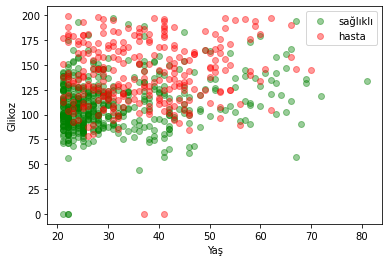

In [3]:
hastalar = data[data.Outcome == 1]
sagliklilar = data[data.Outcome == 0]

# Glikoz değerlerine bakarak çizim yaptıracağım
plt.scatter(sagliklilar.Age, sagliklilar.Glucose, color="green", label="sağlıklı", alpha=0.4)
plt.scatter(hastalar.Age, hastalar.Glucose, color="red", label="hasta", alpha=0.4)
plt.xlabel("Yaş")
plt.ylabel("Glikoz")
plt.legend()
plt.show()

In [5]:
# Eksenleri belirliyorum

y = data.Outcome.values
x_ham_veri = data.drop(["Outcome"],axis=1)
# KNN algoritması sadece x değerleri ile gruplandırma yapacağı için Outcume(Dependent Variable) çıkarıp bağımsızlar kalıyor

# Normalization yaparak tüm değerleri 0-1 arasında olacak hale getiriyoruz
x = (x_ham_veri - np.min(x_ham_veri)) / (np.max(x_ham_veri) - np.min(x_ham_veri))

print("\nBefore normalization:\n")
print(x_ham_veri.head())

print("\nAfter normalization:\n")
print(x.head())


Before normalization:

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  

After normalization:

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2     0.470588  0.919598       0.524590       0.000000  0.000000  0.347243  

In [6]:
# Train ve test datası ayırma
# Tüm verilerin 0.2'si yani %20'si test verisi olacak (test_size=0.2)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)

# KNN modeli oluşturma
knn = KNeighborsClassifier(n_neighbors=3)  # n_neighbors = k
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print("K=3 için testin doğrulama sonucu: ", knn.score(x_test,y_test))

K=3 için testin doğrulama sonucu:  0.7857142857142857


In [7]:
# En iyi k değeri belirleme
sayac = 1
for k in range(1,11):
    knn_yeni = KNeighborsClassifier(n_neighbors=k)
    knn_yeni.fit(x_train,y_train)
    print(sayac," ","Doğruluk oranı: %", knn_yeni.score(x_test,y_test)*100)
    sayac+=1

1   Doğruluk oranı: % 69.48051948051948
2   Doğruluk oranı: % 74.02597402597402
3   Doğruluk oranı: % 78.57142857142857
4   Doğruluk oranı: % 75.97402597402598
5   Doğruluk oranı: % 79.87012987012987
6   Doğruluk oranı: % 79.22077922077922
7   Doğruluk oranı: % 81.16883116883116
8   Doğruluk oranı: % 79.22077922077922
9   Doğruluk oranı: % 78.57142857142857
10   Doğruluk oranı: % 79.22077922077922
